In [4]:
import os
import pandas as pd

#Import PRPL Data
prpl = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/PRPL?period1=1598054400&period2=1606003200&interval=1d&events=history&includeAdjustedClose=true"')
prpl

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-24,20.920000,21.000000,19.129999,20.030001,20.030001,1908300
1,2020-08-25,20.020000,20.209999,18.924999,19.549999,19.549999,1388800
2,2020-08-26,19.570000,20.160000,19.530001,19.660000,19.660000,829300
3,2020-08-27,19.610001,19.840000,19.129999,19.170000,19.170000,736400
4,2020-08-28,19.370001,20.049999,19.059999,19.100000,19.100000,681200
...,...,...,...,...,...,...,...
59,2020-11-16,26.990000,27.309999,26.000000,27.290001,27.290001,1243800
60,2020-11-17,27.219999,29.600000,26.511999,29.350000,29.350000,1558200
61,2020-11-18,29.299999,30.500000,29.250000,29.860001,29.860001,1418400
62,2020-11-19,29.860001,30.500000,29.100000,30.400000,30.400000,644200


In [2]:
#Import S&P Data
spy = pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/^GSPC?period1=1598054400&period2=1606003200&interval=1d&events=history&includeAdjustedClose=true"')
spy

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-24,3418.090088,3432.090088,3413.129883,3431.280029,3431.280029,3728690000
1,2020-08-25,3435.949951,3444.209961,3425.840088,3443.620117,3443.620117,3619300000
2,2020-08-26,3449.969971,3481.070068,3444.149902,3478.729980,3478.729980,3754360000
3,2020-08-27,3485.139893,3501.379883,3468.350098,3484.550049,3484.550049,3929560000
4,2020-08-28,3494.689941,3509.229980,3484.320068,3508.010010,3508.010010,3855880000
...,...,...,...,...,...,...,...
59,2020-11-16,3600.159912,3628.510010,3600.159912,3626.909912,3626.909912,5281980000
60,2020-11-17,3610.310059,3623.110107,3588.679932,3609.530029,3609.530029,4799570000
61,2020-11-18,3612.090088,3619.090088,3567.330078,3567.790039,3567.790039,5274450000
62,2020-11-19,3559.409912,3585.219971,3543.840088,3581.870117,3581.870117,4347200000


In [40]:
#Import Risk Free Data from FRED

rf = pd.read_csv('https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=TB3MS&scale=left&cosd=2019-10-01&coed=2020-10-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Monthly&fam=avg&fgst=lin&fgsnd=2020-02-01&line_index=1&transformation=lin&vintage_date=2020-11-22&revision_date=2020-11-22&nd=1934-01-01')
rf

,DATE,TB3MS
0,2019-10-01,1.65
1,2019-11-01,1.54
2,2019-12-01,1.54
3,2020-01-01,1.52
4,2020-02-01,1.52
5,2020-03-01,0.29
6,2020-04-01,0.14
7,2020-05-01,0.13
8,2020-06-01,0.16
9,2020-07-01,0.13


In [17]:
import statsmodels.api as sm
#Create Single Table
df = pd.merge(spy[['Date','Close']], prpl[['Date', 'Close']], on = 'Date', how='outer', suffixes=('_S&P', '_PRPL'))
df

In [18]:
#Data Cleaning - we need to aggregate the daily returns by month and average them so as to compare against the 3-month t-bill rates
import datetime

df['Date'] = df['Date'].apply(lambda x: datetime.date(int(x[:4]), int(x[5:7]), int(x[8: 10])))
df['Month'] = df['Date'].apply(lambda x: x.month)
df

,Date,Close_S&P,Close_PRPL,Month
0,2020-08-24,3431.280029,20.030001,8
1,2020-08-25,3443.620117,19.549999,8
2,2020-08-26,3478.729980,19.660000,8
3,2020-08-27,3484.550049,19.170000,8
4,2020-08-28,3508.010010,19.100000,8
...,...,...,...,...
59,2020-11-16,3626.909912,27.290001,11
60,2020-11-17,3609.530029,29.350000,11
61,2020-11-18,3567.790039,29.860001,11
62,2020-11-19,3581.870117,30.400000,11


In [41]:
rf['DATE'] = rf['DATE'].apply(lambda x: datetime.date(int(x[:4]), int(x[5:7]), int(x[8: 10])))
rf['Month'] = rf['DATE'].apply(lambda x: x.month)
rf


,DATE,TB3MS,Month
0,2019-10-01,1.65,10
1,2019-11-01,1.54,11
2,2019-12-01,1.54,12
3,2020-01-01,1.52,1
4,2020-02-01,1.52,2
5,2020-03-01,0.29,3
6,2020-04-01,0.14,4
7,2020-05-01,0.13,5
8,2020-06-01,0.16,6
9,2020-07-01,0.13,7


In [42]:
#We're looking at risk free interest rates only for the past three months 
# (November's data is not in the table,but I found that it's .007, so I'll add it manually)

rf = rf[['TB3MS', 'Month']].append({'TB3MS': .007, 'Month': 11}, ignore_index=True)
rf = rf = rf.iloc[10:].set_index('Month')
rf

,TB3MS
Month,
8.0,0.100
9.0,0.110
10.0,0.100
11.0,0.007


In [50]:
#Now let's loop through the closing prices and track their changes
pbefore = 20.030001
sbefore = 3431.280029	
plist = []
slist = []
i = 0
for row in df.iterrows():
    
    pchange = (row[1]['Close_PRPL'] - pbefore) / pbefore
    schange = (row[1]['Close_S&P'] - sbefore) / sbefore
    if i == 0:
        slist.append(0)
        plist.append(0)
        pbefore = row[1]['Close_PRPL']
        sbefore = row[1]['Close_S&P']
        i += 1
        continue
    plist.append(pchange)
    slist.append(schange)
    pbefore = row[1]['Close_PRPL']
    sbefore = row[1]['Close_S&P']

df['PRPL_Change'] = plist
df['S&P_Change'] = slist



In [56]:
#Now we can aggregate our data
df = df.groupby('Month').mean()[['PRPL_Change', 'S&P_Change']].merge(rf, left_index= True, right_index= True)

In [58]:
#The definition of market / asset premium is the return on the portfolio minus the risk-free rate
df['Mkt_Premium'] = df['S&P_Change'] - df['TB3MS']
df['PRPL_Premium'] = df['PRPL_Change'] - df['TB3MS']
df[['Mkt_Premium', 'PRPL_Premium']]

,PRPL_Change,S&P_Change,TB3MS,Mkt_Premium,PRPL_Premium
Month,,,,,
8,-0.009477,0.003334,0.100,-0.096666,-0.109477
9,0.014445,-0.001788,0.110,-0.111788,-0.095555
10,0.006649,-0.001191,0.100,-0.101191,-0.093351
11,0.006193,0.005691,0.007,-0.001309,-0.000807


In [68]:
#The assets beta is the correlation coefficient for the regression where x is the asset premium, and y is the market premium
#So we just need to do a simple linear regression
import statsmodels.api as sm
x = df['PRPL_Premium']
y = df['Mkt_Premium']
x = sm.add_constant(x)
model = sm.OLS(y, x, hasconst=False).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            Mkt_Premium   R-squared (uncentered):                   0.986
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              69.55
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                      0.0142
Time:                        13:13:55   Log-Likelihood:                          12.488
No. Observations:                   4   AIC:                                     -20.98
Df Residuals:                       2   BIC:                                     -22.20
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

#Beta is found to be 1.0001, significant at the 99% level


In [77]:
df['Predicted_Premium'] = 1.0001 * df['Mkt_Premium'] -.0029
df[['PRPL_Premium', 'Predicted_Premium']]

,PRPL_Premium,Predicted_Premium
Month,,
8,-0.109477,-0.099576
9,-0.095555,-0.114699
10,-0.093351,-0.104102
11,-0.000807,-0.004209


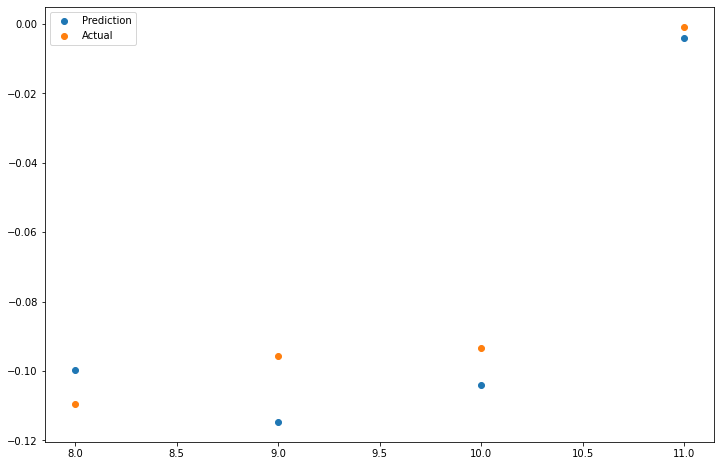

In [76]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 8))
plt.scatter(df.index, df['Predicted_Premium'])
plt.scatter(df.index, df['PRPL_Premium'])

plt.legend(['Prediction', 'Actual'])